# Importing Libraries


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import chart_studio.plotly as py
import cufflinks as cf
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

## Dataset Cleaning

In [2]:
ds_1=pd.read_csv('city_day.csv');

In [3]:
ds_1

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [4]:
new_df = pd.concat([ds_1.iloc[:,0:2],ds_1.iloc[:,-2:]],axis = 1)

new_df = new_df[new_df['City'] == 'Delhi']

In [5]:
new_df['Date'] = pd.to_datetime(new_df['Date'])

In [6]:
new_df['Year'] = new_df['Date'].dt.year

In [7]:
new_df = new_df.set_index(['Year'])

## Making dataframes

In [8]:
ds_delhi_15=new_df.loc['2015'];
ds_delhi_16=new_df.loc['2016'];
ds_delhi_17=new_df.loc['2017'];
ds_delhi_18=new_df.loc['2018'];
ds_delhi_19=new_df.loc['2019'];
ds_delhi_20=new_df.loc['2020'];

In [9]:
ds_delhi_15

,City,Date,AQI,AQI_Bucket
Year,,,,
2015,Delhi,2015-01-01,472.0,Severe
2015,Delhi,2015-01-02,454.0,Severe
2015,Delhi,2015-01-03,143.0,Moderate
2015,Delhi,2015-01-04,319.0,Very Poor
2015,Delhi,2015-01-05,325.0,Very Poor
...,...,...,...,...
2015,Delhi,2015-12-27,370.0,Very Poor
2015,Delhi,2015-12-28,328.0,Very Poor
2015,Delhi,2015-12-29,331.0,Very Poor


# AQI DATAFRAMES

In [10]:
aqi_15 = ds_delhi_15.iloc[:,2].values;
aqi_16 = ds_delhi_16.iloc[:,2].values;
aqi_17 = ds_delhi_17.iloc[:,2].values;
aqi_18 = ds_delhi_18.iloc[:,2].values;
aqi_19 = ds_delhi_19.iloc[:,2].values;
aqi_20 = ds_delhi_20.iloc[:,2].values;

# Visualization Of The Data

In [11]:
aqi_level_15 = new_df.loc['2015']
aqi_level_16 = new_df.loc['2016']
aqi_level_17 = pd.read_csv('delhi_2017.csv')
aqi_level_18 = pd.read_csv('delhi_2018.csv')
aqi_level_19 = pd.read_csv('delhi_2019.csv')
aqi_level_20 = new_df.loc['2020']

In [12]:
aqi_level_20

,City,Date,AQI,AQI_Bucket
Year,,,,
2020,Delhi,2020-01-01,492.0,Severe
2020,Delhi,2020-01-02,485.0,Severe
2020,Delhi,2020-01-03,426.0,Severe
2020,Delhi,2020-01-04,366.0,Very Poor
2020,Delhi,2020-01-05,354.0,Very Poor
...,...,...,...,...
2020,Delhi,2020-06-27,112.0,Moderate
2020,Delhi,2020-06-28,196.0,Moderate
2020,Delhi,2020-06-29,233.0,Poor


In [13]:
#2017
fig = go.Figure(go.Scatter(
    mode = "lines+markers",
    y = aqi_level_17.iloc[:,-2],
    x = aqi_level_17.iloc[:,-3]))
fig.update_xaxes(
        tickangle = 90,
        title_text = "Month",
        title_font = {"size": 20},
        title_standoff = 25)

fig.update_yaxes(
        title_text = "AQI LEVELS",
        title_standoff = 25)
fig.update_layout(title_text="AQI 2017")

fig.show()

In [14]:
#2018
fig = go.Figure(go.Scatter(
    mode = "lines+markers",
    y = aqi_level_18.iloc[:,-2],
    x = aqi_level_18.iloc[:,-3]))
fig.update_xaxes(
        tickangle = 90,
        title_text = "Month",
        title_font = {"size": 20},
        title_standoff = 25)

fig.update_yaxes(
        title_text = "AQI LEVELS",
        title_standoff = 25)
fig.update_layout(title_text="AQI 2018")

fig.show()

In [15]:
#2019
fig = go.Figure(go.Scatter(
    mode = "lines+markers",
    y = aqi_level_19.iloc[:,-2],
    x = aqi_level_19.iloc[:,-3]))
fig.update_xaxes(
        tickangle = 90,
        title_text = "Month",
        title_font = {"size": 20},
        title_standoff = 25)

fig.update_yaxes(
        title_text = "AQI LEVELS",
        title_standoff = 25)
fig.update_layout(title_text="AQI 2019")

fig.show()

In [16]:
from plotly.subplots import make_subplots
fig = make_subplots(rows=2, cols=3,subplot_titles=("2015","2016", "2017", "2018","2019"))
fig.add_trace(
    go.Scatter(
    name ="2016",
    mode = "lines+markers",
    y = aqi_level_16.iloc[:,-2],
    x = aqi_level_16.iloc[:,-3]),
    row = 1 ,col =2)


fig.add_trace(go.Scatter(
    name ="2017",
    mode = "lines+markers",
    y = aqi_level_17.iloc[:,-2],
    x = aqi_level_17.iloc[:,-3]),
    row=1, col=3
)

    
    


fig.add_trace(go.Scatter(
    name ="2018",
    mode = "lines+markers",
    y = aqi_level_18.iloc[:,-2],
    x = aqi_level_18.iloc[:,-3]),
    row=2, col=1
)

fig.add_trace(go.Scatter(
    name ="2019",
    mode = "lines+markers",
    y = aqi_level_19.iloc[:,-2],
    x = aqi_level_19.iloc[:,-3]),
    row=2, col=2
)

fig.add_trace(go.Scatter(
    name ="2015",
    mode = "lines+markers",
    y = aqi_level_15.iloc[:,-2],
    x = aqi_level_15.iloc[:,-3]),
    row=1, col=1
)

fig.update_layout(title_text="AQI IN DIFFERENT YEARS", height=700)
fig.show()


In [17]:
fig = px.scatter_3d(aqi_level_20, x= "AQI", y="Date", z="AQI_Bucket")
fig.show()

In [18]:
aqi_15.shape

(365,)

# Making arrays for last 5 days and present data

In [19]:
x_15=np.zeros((359,6));
point=0;
count=0;
for i in range(0,359,1):
    for j in range(0,6,1):
        x_15[i][j]= aqi_15[point];
        point += 1;
    count += 1;
    point = count;
    if (count == 359):
        break;

In [20]:
x_17=np.zeros((359,6));
point=0;
count=0;
for i in range(0,359,1):
    for j in range(0,6,1):
        x_17[i][j]= aqi_17[point];
        point += 1;
    count += 1;
    point = count;
    if (count == 359):
        break;

In [21]:
x_16=np.zeros((359,6));
point=0;
count=0;
for i in range(0,359,1):
    for j in range(0,6,1):
        x_16[i][j]= aqi_16[point];
        point += 1;
    count += 1;
    point = count;
    if (count == 359):
        break;

In [22]:
x_18=np.zeros((359,6));
point=0;
count=0;
for i in range(0,359,1):
    for j in range(0,6,1):
        x_18[i][j]= aqi_18[point];
        point += 1;
    count += 1;
    point = count;
    if (count == 359):
        break;

In [23]:
x_18

array([[462., 439., 405., 394., 398., 403.],
       [439., 405., 394., 398., 403., 384.],
       [405., 394., 398., 403., 384., 314.],
       ...,
       [557., 577., 475., 405., 458., 413.],
       [577., 475., 405., 458., 413., 420.],
       [475., 405., 458., 413., 420., 484.]])

In [24]:
x_19=np.zeros((359,6));
point=0;
count=0;
for i in range(0,359,1):
    for j in range(0,6,1):
        x_19[i][j]= aqi_19[point];
        point += 1;
    count += 1;
    point = count;
    if (count == 362):
        break;

In [25]:
x_16.shape

(359, 6)

In [26]:
x_17.shape

(359, 6)

# Making a single dataframe of above arrays


Gathering All the data in one dataframe.

In [27]:
ds_5=np.concatenate((x_15,x_16,x_17,x_18,x_19),axis=0);

In [28]:
ds_5.shape

(1795, 6)

In [29]:
ds_5= pd.DataFrame(ds_5, columns = ['last 5th','last 4th','last 3rd','last 2nd','last 1st','present'])

In [30]:
ds_5

,last 5th,last 4th,last 3rd,last 2nd,last 1st,present
0,472.0,454.0,143.0,319.0,325.0,318.0
1,454.0,143.0,319.0,325.0,318.0,353.0
2,143.0,319.0,325.0,318.0,353.0,383.0
3,319.0,325.0,318.0,353.0,383.0,375.0
4,325.0,318.0,353.0,383.0,375.0,376.0
...,...,...,...,...,...,...
1790,441.0,351.0,321.0,376.0,384.0,340.0
1791,351.0,321.0,376.0,384.0,340.0,372.0
1792,321.0,376.0,384.0,340.0,372.0,425.0
1793,376.0,384.0,340.0,372.0,425.0,455.0


# Model Training


### Step 1: Now we start the process of model training by making independent and dependent   variables



In [31]:
svr_X=ds_5.iloc[:,[0,1,2,3,4]].values;
svr_Y=ds_5.iloc[:,[-1]].values;

In [32]:
svr_X

array([[472., 454., 143., 319., 325.],
       [454., 143., 319., 325., 318.],
       [143., 319., 325., 318., 353.],
       ...,
       [321., 376., 384., 340., 372.],
       [376., 384., 340., 372., 425.],
       [384., 340., 372., 425., 455.]])

### Step 2 :Removing the null values 

In [33]:
from sklearn.impute import SimpleImputer;
ds_imputer=SimpleImputer(missing_values=np.nan,strategy='mean');
ds_imputer.fit(svr_X);
svr_X=ds_imputer.transform(svr_X);

In [34]:
# from sklearn.impute import SimpleImputer;
# ds_imputer=SimpleImputer(missing_values=np.nan,strategy='mean');
ds_imputer.fit(svr_Y);
svr_Y=ds_imputer.transform(svr_Y);

In [35]:
svr_X

array([[472., 454., 143., 319., 325.],
       [454., 143., 319., 325., 318.],
       [143., 319., 325., 318., 353.],
       ...,
       [321., 376., 384., 340., 372.],
       [376., 384., 340., 372., 425.],
       [384., 340., 372., 425., 455.]])

In [36]:
svr_Y

array([[318.],
       [353.],
       [383.],
       ...,
       [425.],
       [455.],
       [506.]])

### Step 3: Test - Train - Split

In [37]:
from sklearn.model_selection import train_test_split;
svr_x_train,svr_x_test,svr_y_train,svr_y_test=train_test_split(svr_X,svr_Y,test_size=0.2,random_state=1);

### Step 4 : Using Regression Model : Support Vector Regression

In [38]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'linear')
regressor.fit(svr_x_train, svr_y_train);

C:\Users\payus\.conda\envs\tensorflow_env\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [39]:
svr_y_pred=regressor.predict(svr_x_test); #prediction of testing data

In [40]:
svr_y_pred.shape


(359,)

In [41]:
svr_y_test.shape

(359, 1)

In [42]:
df_y =pd.DataFrame(np.concatenate((svr_y_pred.reshape(359,1),svr_y_test),axis =1),columns = ["Predicted","Actual"])

## Comparision Of Predicted AQI and Actual AQI

In [43]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

trace1 = go.Scatter(
   
    y=df_y.iloc[:,-1],
    name="Actual",
    marker=dict(
        color='rgb(34,163,192)'
               )
)
trace2 = go.Scatter(
    y=df_y.iloc[:,0],
    
    name='Predicted',
    yaxis='y2'

)
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(trace1)
fig.add_trace(trace2,secondary_y=True)
fig['layout'].update(height = 600, width = 800, title = "SVR Comparision On Testing Data ",xaxis=dict(
      tickangle=-90
    ))
fig.show()

### Step 5 : Checking accuracy using built-in functions

In [44]:
from sklearn.metrics import r2_score
r2_score(svr_y_test,svr_y_pred)

0.8037523499557522

In [45]:
from sklearn.metrics import explained_variance_score
explained_variance_score(svr_y_test, svr_y_pred)

0.8037537954168209

In [46]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(svr_y_test,svr_y_pred)

0.18268449312213988

## Using Different Model For Comparision

### 1.) XGBOOST Model

In [47]:

xg_X = np.concatenate((aqi_15.reshape(365,1),
                     aqi_16[[range(0,365)]].reshape(365,1),
                     aqi_17.reshape(365,1),
                     aqi_18.reshape(365,1),
                     aqi_19.reshape(365,1)),axis=1)
xg_Y = aqi_19.reshape(365,1);

C:\Users\payus\AppData\Local\Temp/ipykernel_20284/1435430374.py:2: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



In [48]:
xg_X.shape

(365, 5)

In [49]:
xg_X[205,:]

array([184.,  nan,  37.,  90.,  98.])

In [50]:
from sklearn.impute import SimpleImputer;
ds_imputer=SimpleImputer(missing_values=np.nan,strategy='mean');
ds_imputer.fit(xg_X);
xg_X=ds_imputer.transform(xg_X);
ds_imputer.fit(xg_Y);
xg_Y=ds_imputer.transform(xg_Y);

In [51]:
xg_x_train,xg_x_test,xg_y_train,xg_y_test=train_test_split(xg_X,xg_Y,test_size=0.2,random_state=1);

In [52]:

from xgboost import XGBRegressor;
xg_regressor=XGBRegressor();
xg_regressor.fit(svr_x_train, svr_y_train);

In [53]:
xg_pred=xg_regressor.predict(xg_X )

In [54]:
svr_x_train

array([[167., 146., 174., 280., 243.],
       [220., 312., 389., 406., 280.],
       [169., 277., 332., 357., 372.],
       ...,
       [351., 310., 362., 343., 286.],
       [123., 175., 245., 248., 247.],
       [389., 406., 280., 263., 276.]])

In [55]:
print(xg_x_test.shape)

(73, 5)


### Error in XgBoost Model

In [56]:
xg_real_pred = xg_regressor.predict(svr_x_test)

In [57]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(xg_real_pred,svr_y_test)

0.18879906676799119

In [58]:
xg_pred.shape

(365,)

In [59]:
from sklearn.metrics import r2_score
r2_score(xg_real_pred, svr_y_test)

0.6823541588076896

### Visualization in XgBoost 

In [60]:
df_xg =pd.DataFrame(np.concatenate((xg_pred[range(0,183)].reshape(183,1),
                                    aqi_20.reshape(183,1)),
                                   axis = 1 ),
                                columns = ["Predicted","Actual"])

In [61]:
df_xg

,Predicted,Actual
0,438.699280,492.0
1,488.050812,485.0
2,582.193115,426.0
3,398.052185,366.0
4,380.734436,354.0
...,...,...
178,177.709793,112.0
179,222.914368,196.0
180,251.727554,233.0
181,153.602432,114.0


In [62]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

trace1 = go.Scatter(
   
    y=df_xg.iloc[:,-1],
    name="Actual",
    marker=dict(
        color='rgb(34,163,192)'
               )
)
trace2 = go.Scatter(
    y=df_xg.iloc[:,0],
    
    name='Predicted',
    yaxis='y2'

)
fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(trace1)
fig.add_trace(trace2,secondary_y=True)
fig['layout'].update(height = 600, width = 800, title = "2020 Predicition Using SVR",xaxis=dict(
      tickangle=-90
    ))
fig.show()

In [63]:
b=np.mean(df_xg.iloc[85:,-1]) #actual

In [ ]:
t

In [ ]:
a

In [ ]:
b

### 2.) Decision Tree Model

In [66]:
from sklearn.tree import DecisionTreeRegressor;
dtr_regressor=DecisionTreeRegressor(random_state=0);
dtr_regressor.fit(svr_x_train,svr_y_train);

### Error In Decision Tree Model

In [67]:
dtr_pred=dtr_regressor.predict(svr_x_test)
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(svr_y_test,dtr_pred)

0.2542304763116737

### 3.) Random Forest Classification

In [68]:
from sklearn.ensemble import RandomForestRegressor;
rfr_regressor=RandomForestRegressor(n_estimators=10,random_state=0);
rfr_regressor.fit(svr_x_train,svr_y_train);

C:\Users\payus\AppData\Local\Temp/ipykernel_20284/2062847801.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [69]:
rfr_pred=rfr_regressor.predict(svr_x_test)
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(svr_y_test,rfr_pred)

0.20051494206688542

In [70]:
aqi_16.shape

(366,)

In [71]:
aqis=np.concatenate((aqi_15.reshape(365,1),aqi_16[[range(0,365)]].reshape(365,1),aqi_17.reshape(365,1),aqi_18.reshape(365,1),aqi_19.reshape(365,1)),axis=1)
aqis

C:\Users\payus\AppData\Local\Temp/ipykernel_20284/2862716290.py:1: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



array([[472., 463., 332., 462., 475.],
       [454., 465., 384., 439., 501.],
       [143., 426., 373., 405., 537.],
       ...,
       [331., 455., 399., 420., 455.],
       [412., 524., 421., 484., 506.],
       [433., 381., 451., 509., 417.]])

In [72]:
xg_test=np.zeros((365,6));
for i in range(0,365,1):
    for j in range(0,5,1):
        xg_test[i][j]=aqis[i][j];

In [73]:
xg_pred_2020=xg_regressor.predict(aqis)

In [74]:
xg_pred

array([438.69928 , 488.0508  , 582.1931  , 398.0522  , 380.73444 ,
       399.35364 , 317.3249  , 368.015   , 340.42957 , 315.02335 ,
       445.92773 , 420.79025 , 455.9624  , 379.48123 , 313.11124 ,
       382.87698 , 504.98898 , 438.05304 , 401.08353 , 475.05737 ,
       418.37085 , 250.6107  , 228.73915 , 342.18048 , 247.97964 ,
       332.02078 , 299.23468 , 326.06186 , 317.64218 , 355.3267  ,
       369.12985 , 353.35013 , 345.25467 , 311.7538  , 288.9038  ,
       375.5039  , 456.42816 , 232.07716 , 145.66862 , 225.10529 ,
       311.77722 , 309.9323  , 392.62592 , 417.41254 , 401.33478 ,
       392.81854 , 314.64908 , 236.98041 , 330.60043 , 224.7668  ,
       310.53976 , 162.6629  , 147.49034 ,  66.19994 , 199.20108 ,
       193.80508 , 179.2855  , 144.24191 , 195.29134 , 225.72179 ,
       217.44983 , 197.66904 , 213.55183 , 212.5853  , 212.3303  ,
       210.59831 , 227.23936 , 136.87299 , 170.28546 , 219.52812 ,
       134.56796 , 164.07455 , 291.8831  , 163.55855 , 168.194

In [75]:
aqis_2021=np.concatenate((aqi_16[[range(0,365)]].reshape(365,1),aqi_17.reshape(365,1),aqi_18.reshape(365,1),aqi_19.reshape(365,1),xg_pred_2020.reshape(365,1)),axis=1)

C:\Users\payus\AppData\Local\Temp/ipykernel_20284/2967300903.py:1: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



In [79]:
xg_regressor.fit(svr_x_train, np.ravel(svr_y_train));

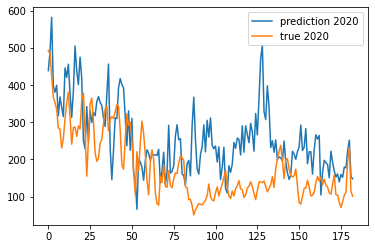

In [80]:
fig1=plt.figure()
plt.plot(xg_pred_2020[range(0,183)])
plt.plot(aqi_20)
plt.legend(['prediction 2020','true 2020'])

In [81]:
from sklearn.impute import SimpleImputer;
ds_imputer=SimpleImputer(missing_values=np.nan,strategy='mean');
ds_imputer.fit(aqis);
aqis=ds_imputer.transform(aqis);